In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import math
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

## **Columns Explained**

1. **fixed acidity**  
   - Non-volatile acids (e.g., tartaric acid) that don’t evaporate easily.  
   - Contribute to tartness and stability.  
   - Think of this as the "backbone" of acidity.

2. **volatile acidity**  
   - Acids that can evaporate (e.g., acetic acid, like vinegar).  
   - High levels give unpleasant vinegar smell/taste.  
   - A little is fine; too much ruins the wine.

3. **citric acid**  
   - A natural preservative that can add freshness and slight lemony flavor.  
   - Small amounts improve taste; too much makes wine harsh.

4. **residual sugar**  
   - Leftover sugar after fermentation.  
   - Low = dry wine, higher = sweet wine.  
   - Example: dry red <1 g/L, dessert wine much higher.

5. **chlorides**  
   - Amount of salt (NaCl) in the wine.  
   - High levels → salty taste (undesirable).

6. **free sulfur dioxide**  
   - Portion of SO₂ that is free in the wine (not bound).  
   - Acts as antimicrobial and antioxidant.  
   - Too much affects smell/taste.

7. **total sulfur dioxide**  
   - Free + bound SO₂.  
   - High levels give sharp, unpleasant smell (like struck match).  
   - Controlled carefully in winemaking.

8. **density**  
   - Related to alcohol and sugar content.  
   - Water = 1.000; wines slightly above/below depending on alcohol/sugar.

9. **pH**  
   - Measure of acidity/basicity.  
   - Lower = more acidic.  
   - Wines typically between 3–4.  
   - Influences taste, color, stability.

10. **sulphates**  
    - Compounds that contribute to SO₂ levels.  
    - Aid preservation and affect aroma.  
    - Balance is important.

11. **alcohol**  
    - Percentage of alcohol by volume.  
    - Strongly influences body, warmth, and perceived sweetness.

12. **quality**  
    - Target variable (score typically 0–10).  
    - Assigned by wine experts based on taste, smell, balance, etc.  
    - In this dataset: mostly between 3–8.

# **Applying the LOADING:**
1. **L**: Load and inspect the dataset
2. **O**: Overview missing values
3. **A**: Analyse target & feature (see if they are categorical or numerical)
4. **D**: Delve into correlation to see which features affect each other
5. **I**: Investigate feature-target relation (generally we create plots here)
6. **N**: Neaten data (Outlier handling, data preprocessing like scaling, encoding)
7. **G**: Gather insights & start next step (modeling)

## 1. **Loading and Inspecting the Dataset**

In [60]:
df_red = pd.read_csv('./data/winequality-red.csv', sep = ';') # made from red or black grapes
df_white = pd.read_csv('./data/winequality-white.csv', sep = ';') # made from green or yellow grapes

In [61]:
# Looking at red wine quality data
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
# Looking at white wine quality data
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [63]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [64]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [65]:
df_red['quality'].unique()

array([5, 6, 7, 4, 8, 3])

## 2.**Overview Missing Values**

In [66]:
print(f'Missing values for red wine dataset: {df_red.isnull().sum()}')
print(f'\nMissing values for white wine dataset: {df_white.isnull().sum()}')

Missing values for red wine dataset: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing values for white wine dataset: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### 2.1.*Checking and dropping if duplicate values present*

In [67]:
print(f'Duplicate values for red wine dataset: {df_red.duplicated().sum()}')
print(f'Duplicate values for white wine dataset: {df_white.duplicated().sum()}')

Duplicate values for red wine dataset: 240
Duplicate values for white wine dataset: 937


In [68]:
df_red.drop_duplicates(inplace=True)
df_white.drop_duplicates(inplace=True)

In [69]:
print(f'Red wine dataset after dropping duplicates: {df_red.duplicated().sum()}')
print(f'White wine dataset after dropping duplicates: {df_white.duplicated().sum()}')

Red wine dataset after dropping duplicates: 0
White wine dataset after dropping duplicates: 0


## 3.**Analysing Target and Feature**

In [70]:
# since we are predicting for quality, 'quality' becomes target and rest all of them become feature
print(df_red['quality'].unique())
df_white['quality'].unique()
# target is numerical and so are all the features

[5 6 7 4 8 3]


array([6, 5, 7, 8, 4, 3, 9])

### 3.1.*Checking how much imbalanced the dataset is*

In [71]:
unique_classes_red = df_red['quality'].unique()
unique_classes_white = df_white['quality'].unique()

In [72]:
def check_imbalance(df: pd.DataFrame, classes, num_data):
    for cls in classes:
        print(f"Class {cls}: {((df['quality'].value_counts()[cls] / num_data) * 100):.2f}%")

In [73]:
print('For red wine dataset:')
check_imbalance(df_red, unique_classes_red, df_red.shape[0])
print('\nFor white wine dataset:')
check_imbalance(df_white, unique_classes_white, df_white.shape[0])

For red wine dataset:
Class 5: 42.46%
Class 6: 39.37%
Class 7: 12.29%
Class 4: 3.90%
Class 8: 1.25%
Class 3: 0.74%

For white wine dataset:
Class 6: 45.14%
Class 5: 29.66%
Class 7: 17.39%
Class 8: 3.31%
Class 4: 3.86%
Class 3: 0.50%
Class 9: 0.13%


### 3.2. *Handling Imbalanced Dataset*

In [74]:
# we will be using SMOTE while model implementation to handle imbalanced data
# SMOTE cause that way it will work with both SVM and Neural Network which both require enough data

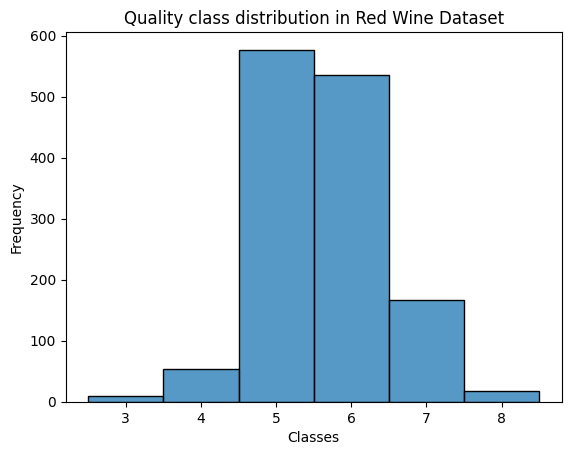

In [75]:
sns.histplot(x = df_red['quality'], discrete=True)
plt.title('Quality class distribution in Red Wine Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

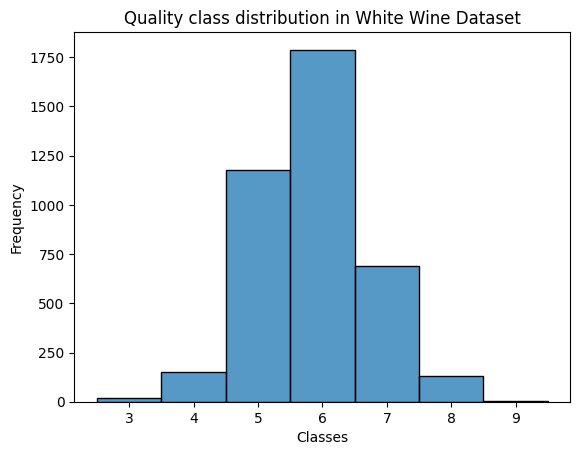

In [76]:
sns.histplot(x = df_white['quality'], discrete=True)
plt.title('Quality class distribution in White Wine Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

## 4.**Delving into Correlation**

### 4.1.*Checking for Linear Relations*

In [77]:
corr_matrix_red = df_red.corr()
corr_matrix_white = df_white.corr()

In [78]:
corr_matrix_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


In [79]:
corr_matrix_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free sulfur dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total sulfur dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


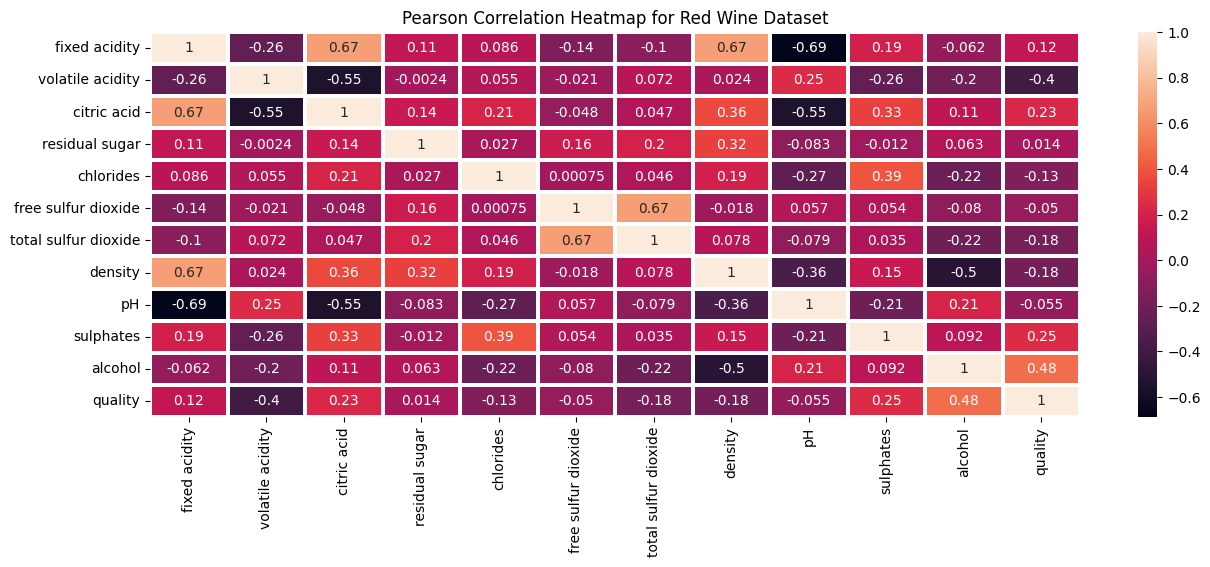

In [80]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix_red, annot=True, linewidths=1.5)
plt.title('Pearson Correlation Heatmap for Red Wine Dataset')
plt.show()

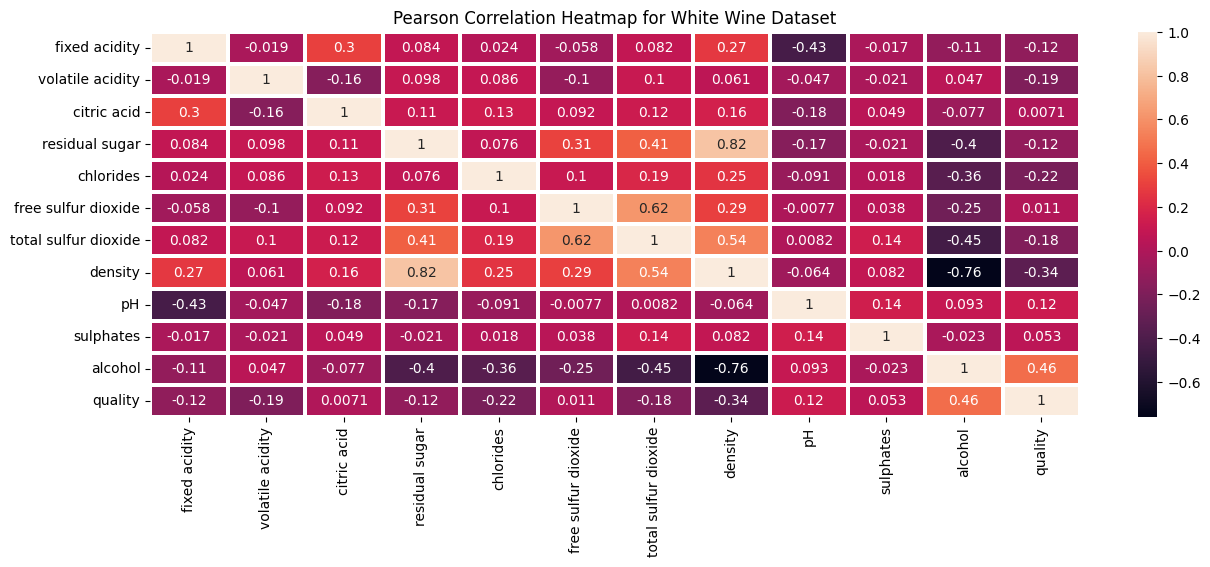

In [81]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix_white, annot=True, linewidths=1.5)
plt.title('Pearson Correlation Heatmap for White Wine Dataset')
plt.show()

### 4.2.*Checking for Non-Linear Relations*

In [82]:
corr_matrix_red_spear = df_red.corr(method='spearman')
corr_matrix_white_spear = df_white.corr(method='spearman')

In [83]:
corr_matrix_red_spear

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.280162,0.657387,0.222396,0.244095,-0.157857,-0.083827,0.626628,-0.708560,0.220696,-0.062696,0.111693
volatile acidity,-0.280162,1.000000,-0.610925,0.031299,0.170678,0.012162,0.092548,0.032264,0.245973,-0.324207,-0.225714,-0.387450
citric acid,0.657387,-0.610925,1.000000,0.170096,0.110679,-0.059585,0.021124,0.344303,-0.558594,0.341512,0.090798,0.219427
residual sugar,0.222396,0.031299,0.170096,1.000000,0.215528,0.077652,0.141515,0.414489,-0.091543,0.029702,0.112205,0.025749
chlorides,0.244095,0.170678,0.110679,0.215528,1.000000,0.010096,0.141324,0.420550,-0.234452,0.033630,-0.301525,-0.204360
free sulfur dioxide,-0.157857,0.012162,-0.059585,0.077652,0.010096,1.000000,0.789881,-0.025635,0.090857,0.041320,-0.099386,-0.058746
total sulfur dioxide,-0.083827,0.092548,0.021124,0.141515,0.141324,0.789881,1.000000,0.137455,-0.029526,-0.008333,-0.275353,-0.196620
density,0.626628,0.032264,0.344303,0.414489,0.420550,-0.025635,0.137455,1.000000,-0.322763,0.157787,-0.470019,-0.184302
pH,-0.708560,0.245973,-0.558594,-0.091543,-0.234452,0.090857,-0.029526,-0.322763,1.000000,-0.100048,0.183005,-0.042738
sulphates,0.220696,-0.324207,0.341512,0.029702,0.033630,0.041320,-0.008333,0.157787,-0.100048,1.000000,0.207636,0.380581


In [84]:
corr_matrix_white_spear

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.037328,0.308689,0.092093,0.090136,-0.035506,0.096047,0.263979,-0.420407,-0.007606,-0.087765,-0.094236
volatile acidity,-0.037328,1.000000,-0.161104,0.145917,0.017037,-0.089430,0.132091,0.037931,-0.062852,-0.007954,0.013266,-0.185385
citric acid,0.308689,-0.161104,1.000000,0.030789,0.047333,0.084318,0.089576,0.099580,-0.169143,0.062574,-0.034389,0.030293
residual sugar,0.092093,0.145917,0.030789,1.000000,0.191767,0.345052,0.431846,0.743296,-0.153187,0.000744,-0.378605,-0.092462
chlorides,0.090136,0.017037,0.047333,0.191767,1.000000,0.165546,0.368464,0.500773,-0.033579,0.099878,-0.565509,-0.333089
free sulfur dioxide,-0.035506,-0.089430,0.084318,0.345052,0.165546,1.000000,0.619998,0.322096,-0.017051,0.031688,-0.270173,0.032555
total sulfur dioxide,0.096047,0.132091,0.089576,0.431846,0.368464,0.619998,1.000000,0.568226,-0.002188,0.156994,-0.473471,-0.202576
density,0.263979,0.037931,0.099580,0.743296,0.500773,0.322096,0.568226,1.000000,-0.080766,0.103765,-0.808451,-0.382900
pH,-0.420407,-0.062852,-0.169143,-0.153187,-0.033579,-0.017051,-0.002188,-0.080766,1.000000,0.130640,0.119420,0.136190
sulphates,-0.007606,-0.007954,0.062574,0.000744,0.099878,0.031688,0.156994,0.103765,0.130640,1.000000,-0.060261,0.035592


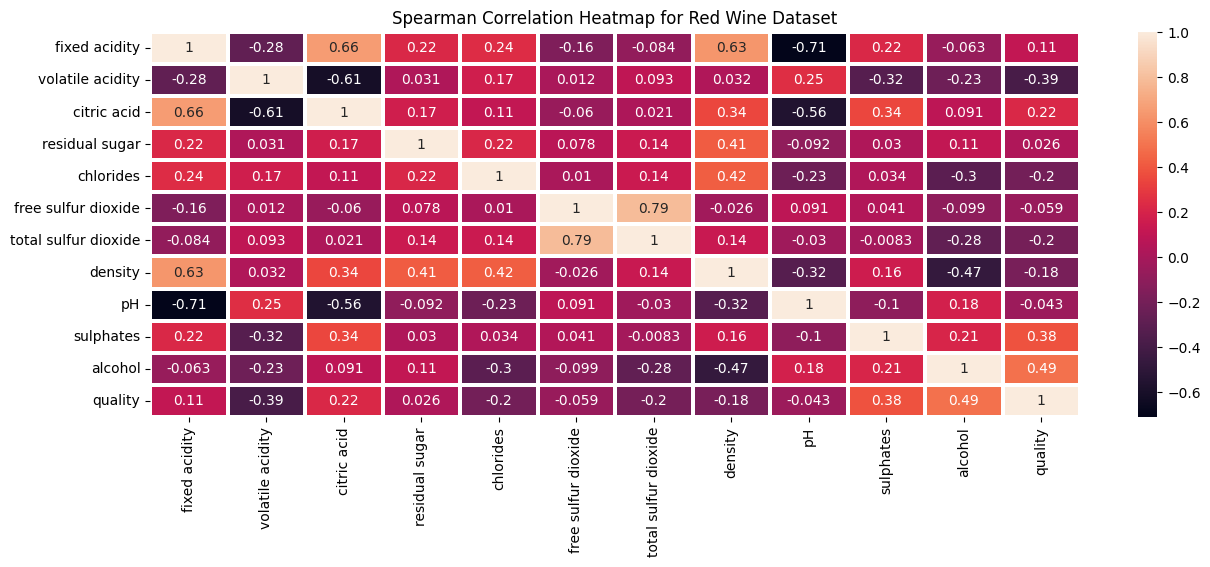

In [85]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix_red_spear, annot=True, linewidths=1.5)
plt.title('Spearman Correlation Heatmap for Red Wine Dataset')
plt.show()

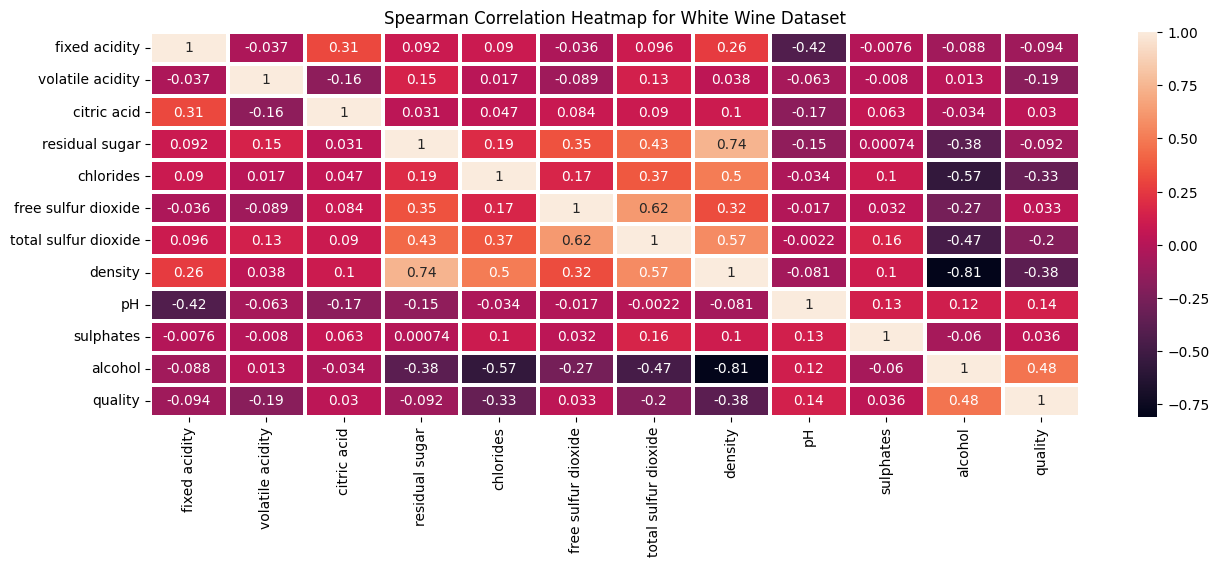

In [86]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_matrix_white_spear, annot=True, linewidths=1.5)
plt.title('Spearman Correlation Heatmap for White Wine Dataset')
plt.show()

In [87]:
# Finding: 
# It can be found that there are features that are correlated with each other that means there's multi-collinearity
# In red wine: alcohol, sulphates, and volatile acidity show good correlation
# In white wine: alcohol, density, and chlorides show good correlation 

## 5.**Investigating Feature-Target Relation**

In [88]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [89]:
# creating a function for subplots for scatter plots

from typing import Tuple
def target_feature_scatter_plots(df: pd.DataFrame, target: str, num_cols: int, fig_size: Tuple[int, int] = (15,10)):
    # creating sub plots
    X = df.drop(columns=[target], axis=1)
    n_features = len(X.columns)
    n_cols = num_cols
    n_rows = math.ceil(n_features / n_cols)

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = fig_size)
    axes = axes.flatten() # flattening to use as 1D array

    # creating sub plot for each feature vs target
    for i, col in enumerate(X.columns):
        sns.scatterplot(x = df[target], y = col, data = df, ax = axes[i])
        axes[i].set_title(f'{target} vs {col}')

    # deleting unused axes
    for j in range(len(X.columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


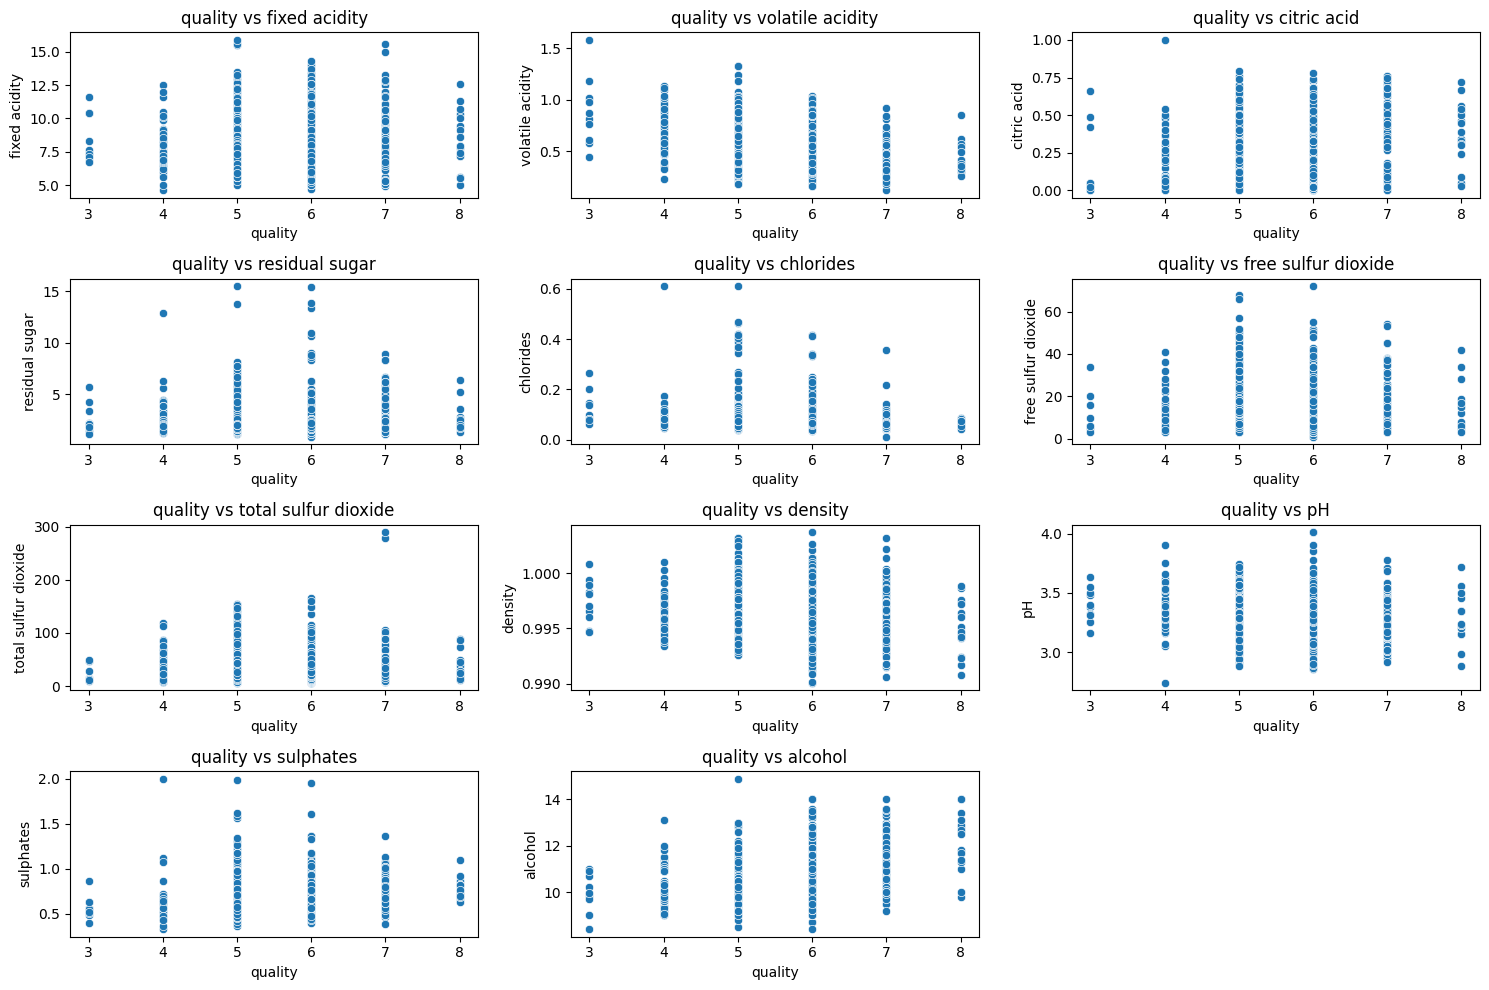

In [90]:
target_feature_scatter_plots(df_red, 'quality', 3)

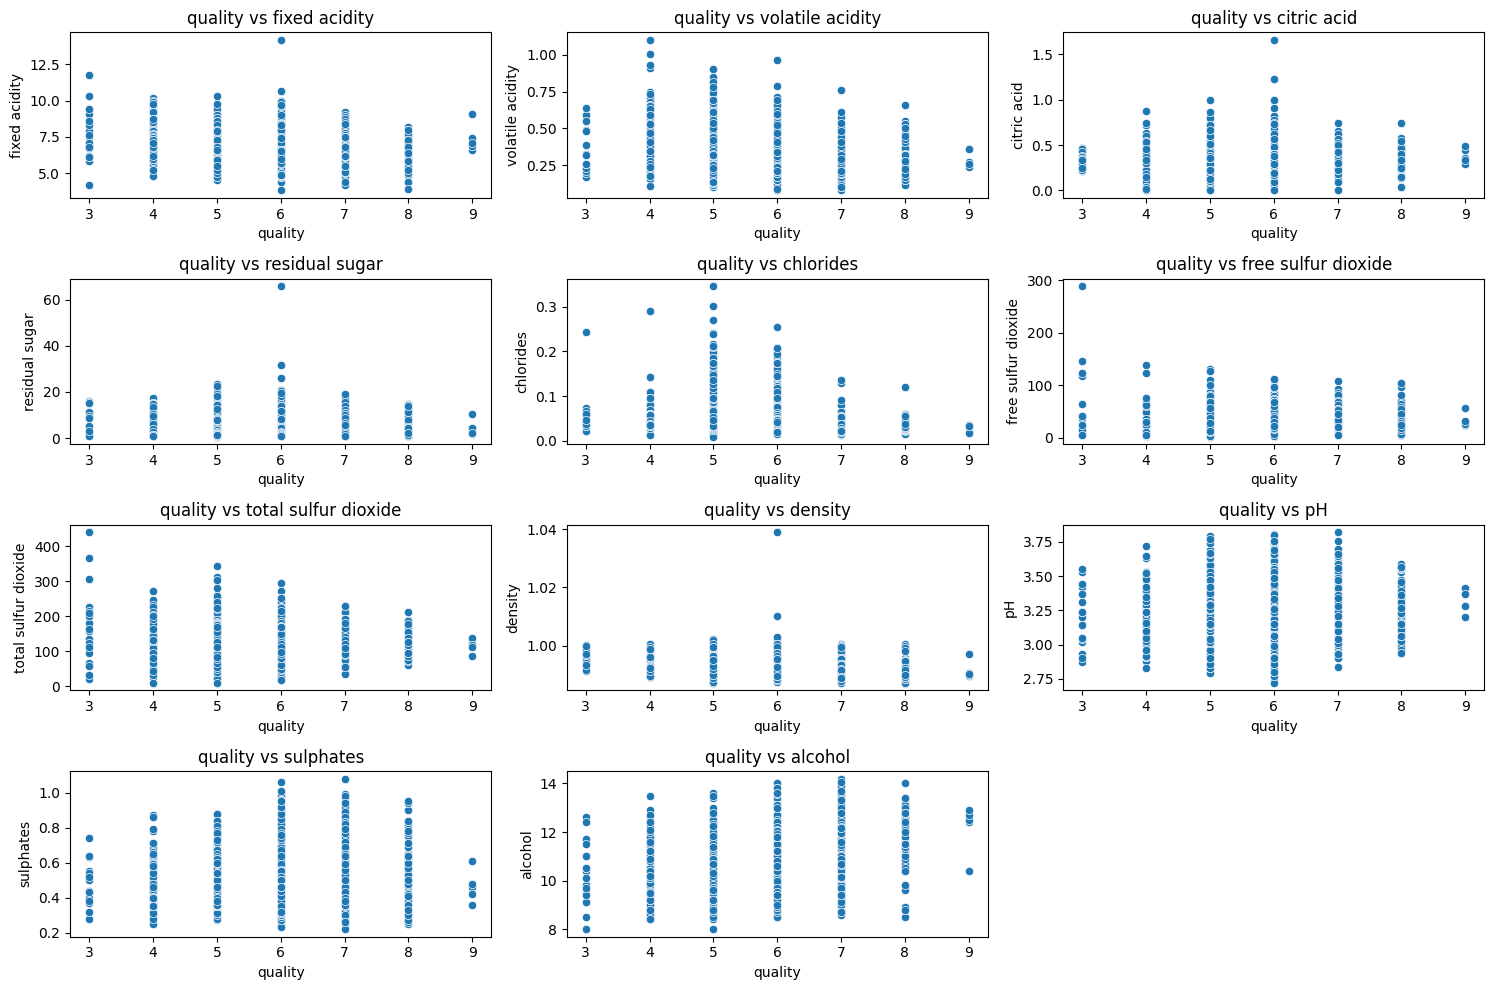

In [91]:
target_feature_scatter_plots(df_white, 'quality', 3)

### 5.1.*Checking the distribution of each feature*

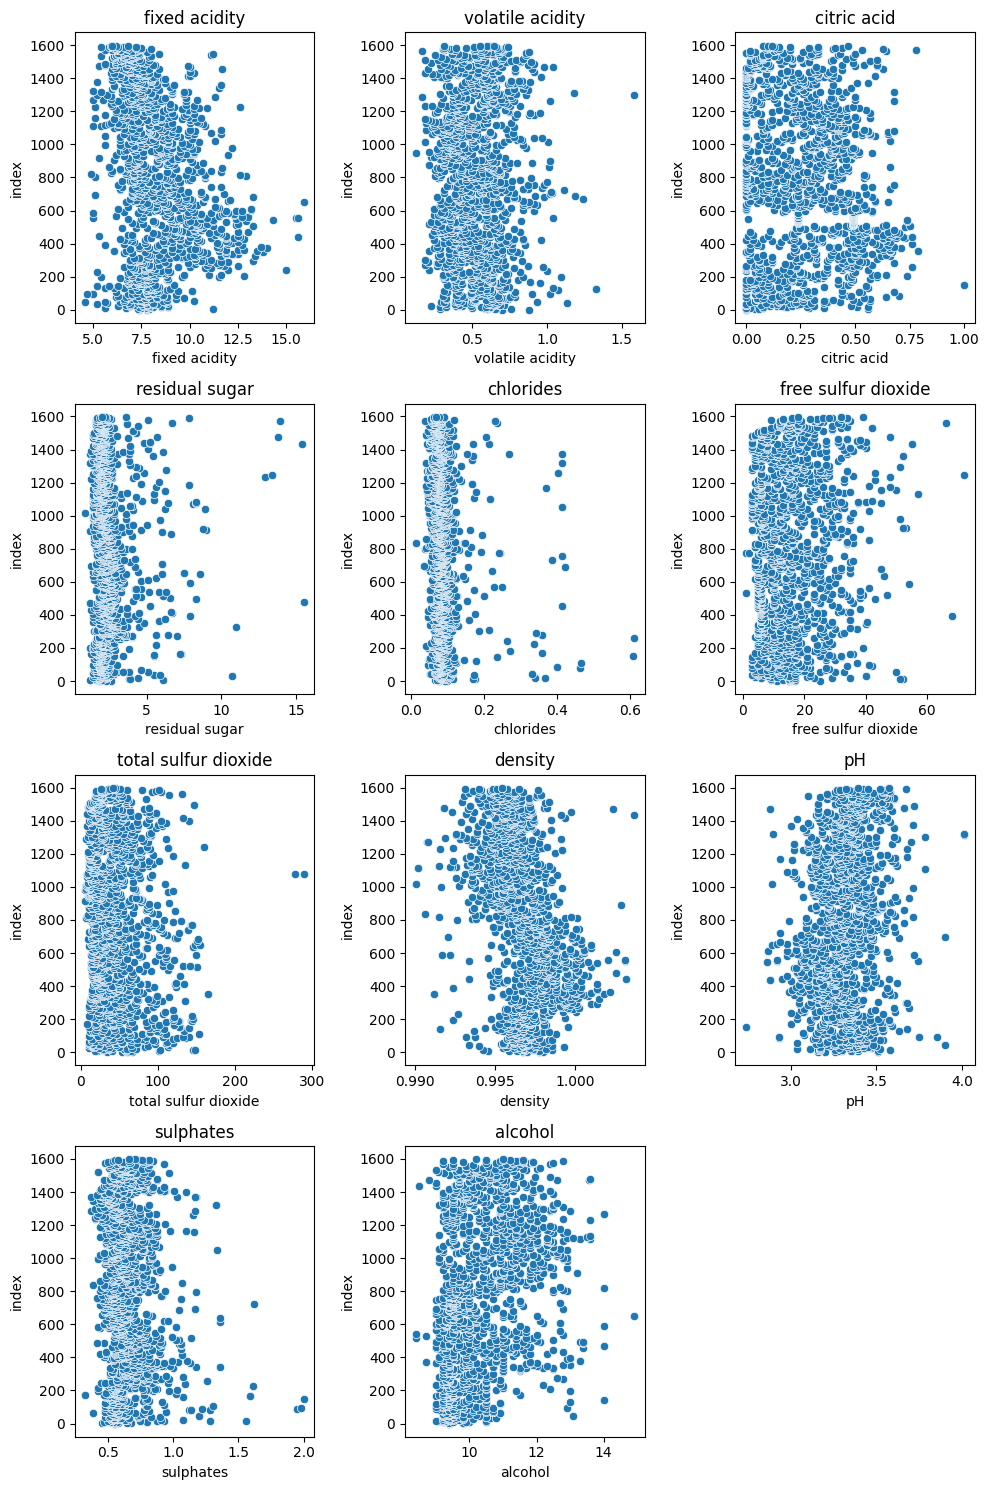

In [92]:
# for red wine
X = df_red.drop(columns=['quality'], axis=1)
n_features = len(X.columns)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (10,15))
axes = axes.flatten() # flattening to use as 1D array

# creating sub plot for each feature vs target
for i, col in enumerate(X.columns):
    sns.scatterplot(x=df_red[col], y=df_red.index, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('index')
    
# deleting unused axes
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])    
plt.tight_layout()
plt.show()

In [93]:
# looking at the above graph, we can deduce that the feature's distribution is indeed linear

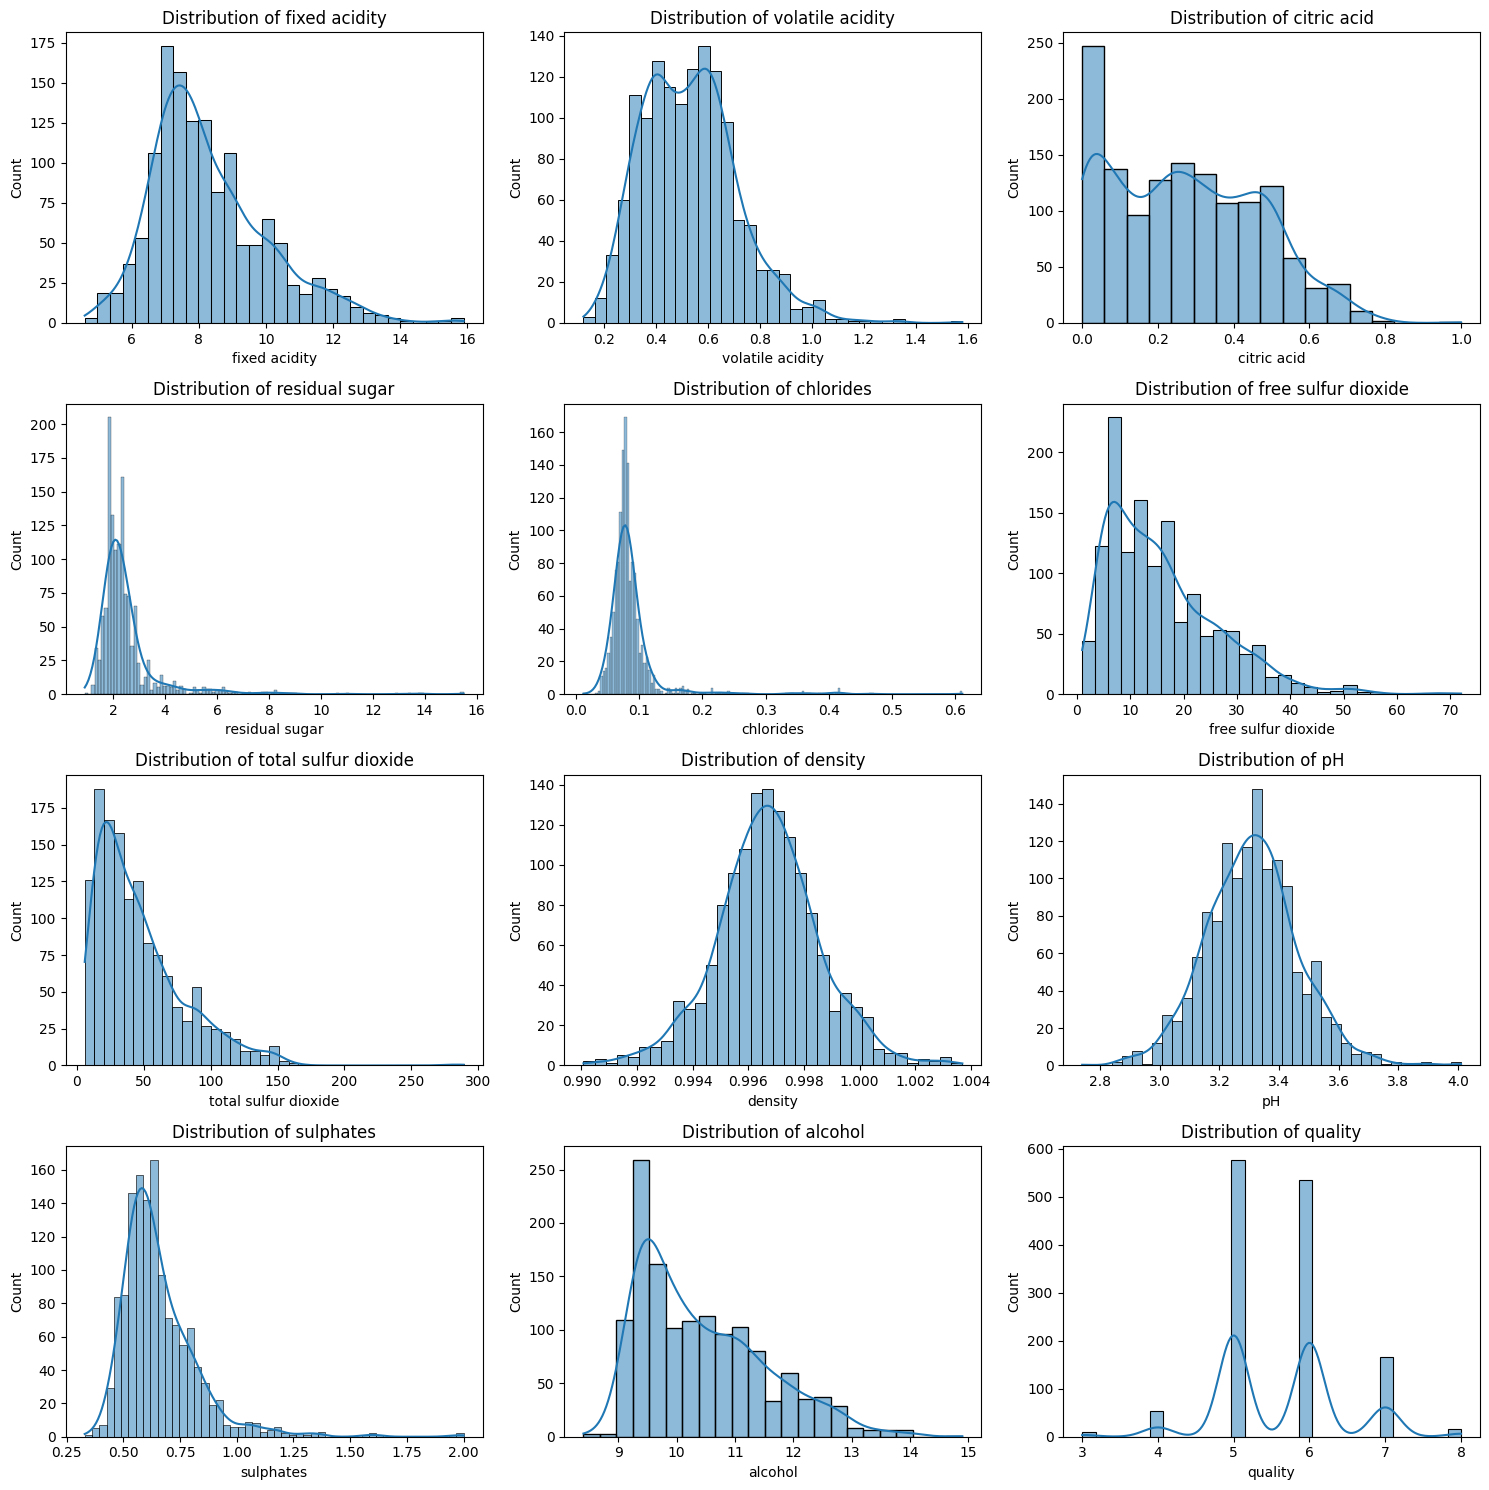

In [94]:
X = df_red.copy()   # keep quality too
n_features = len(X.columns)

n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
axes = axes.flatten()

# plot histogram for each column
for i, col in enumerate(X.columns):
    '''Kernel Density Estimation (KDE) is a technique used to estimate the probability density function (PDF) 
    of a continuous random variable'''
    sns.histplot(X[col], kde=True, ax=axes[i])   # kde=True adds smooth curve
    axes[i].set_title(f'Distribution of {col}')

for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


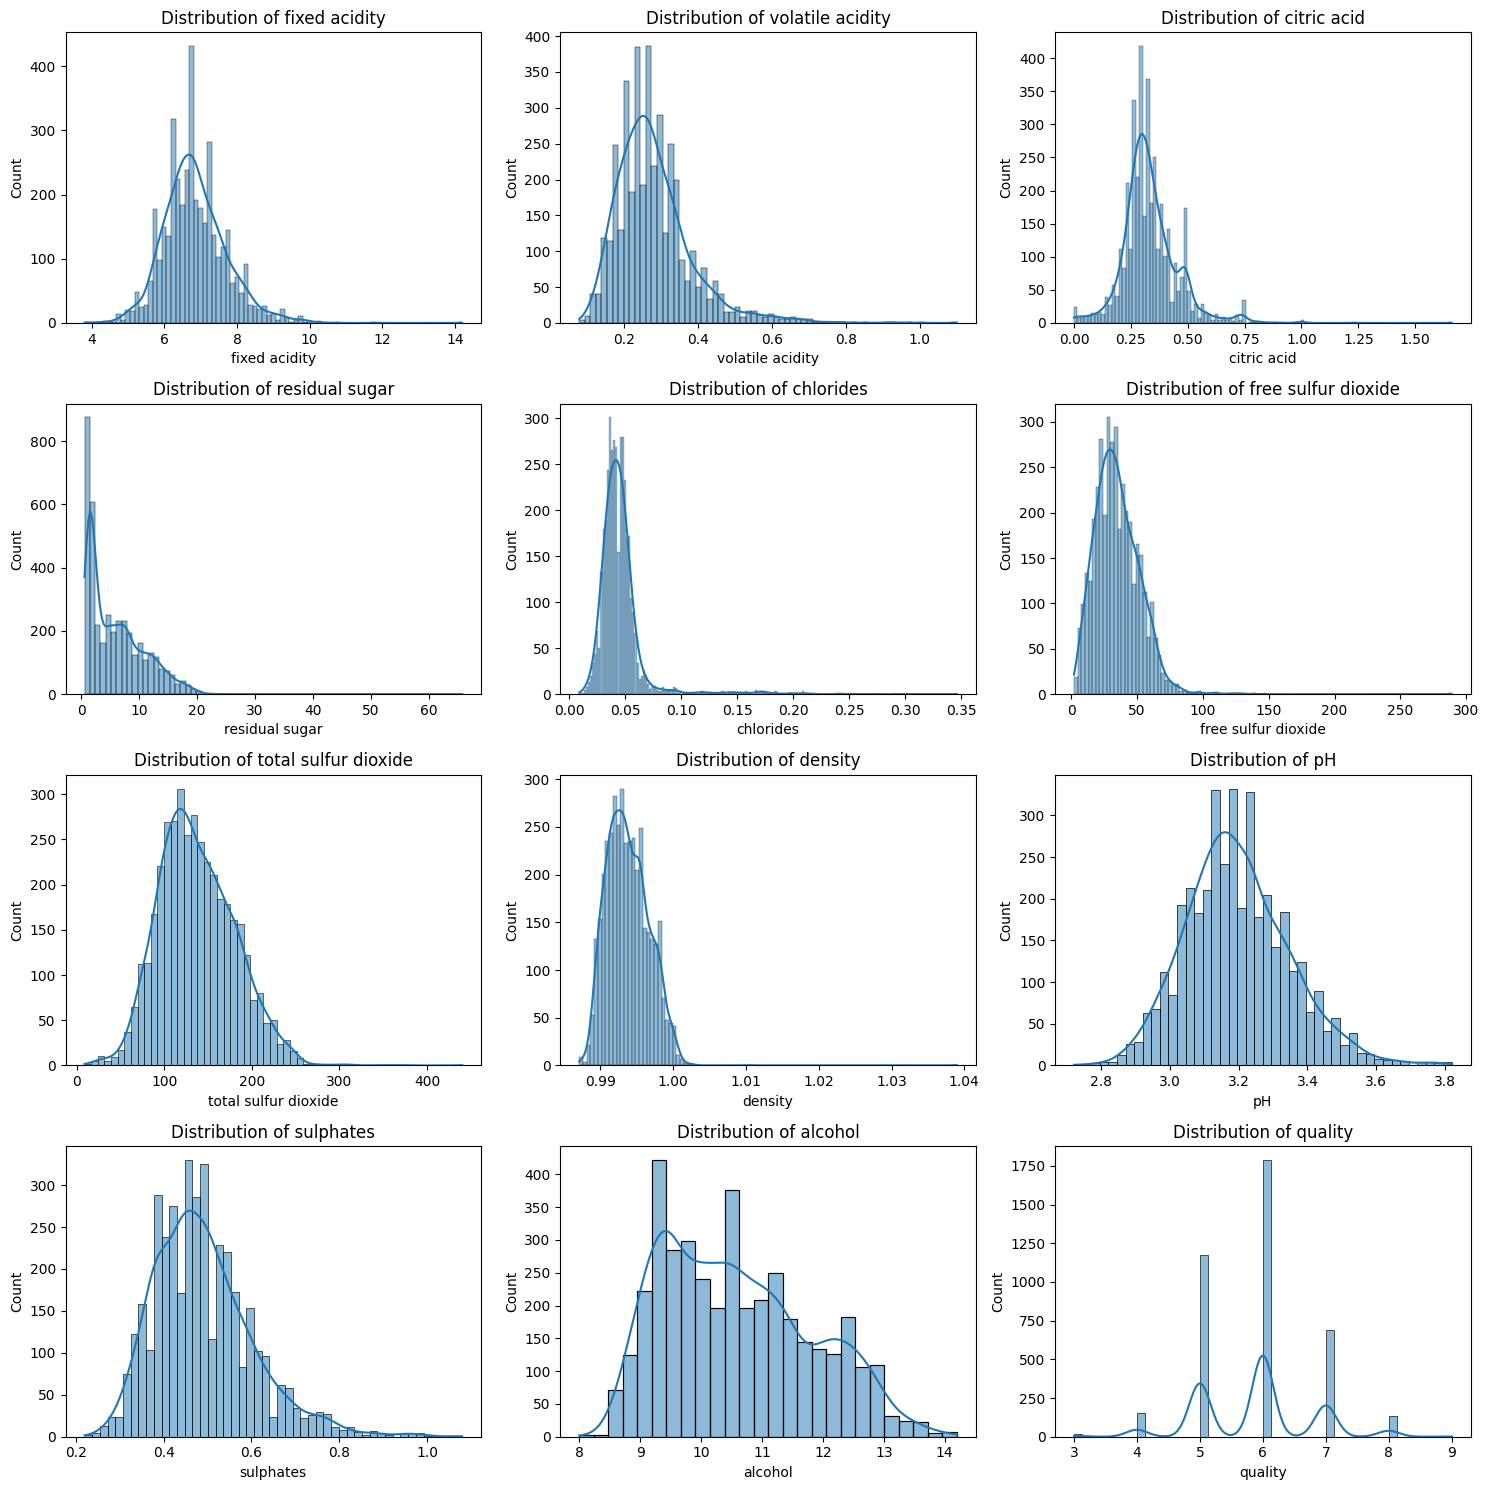

In [95]:
X = df_white.copy()   # keep quality too
n_features = len(X.columns)

n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
axes = axes.flatten()

# plot histogram for each column
for i, col in enumerate(X.columns):
    '''Kernel Density Estimation (KDE) is a technique used to estimate the probability density function (PDF) 
    of a continuous random variable'''
    sns.histplot(X[col], kde=True, ax=axes[i])   # kde=True adds smooth curve
    axes[i].set_title(f'Distribution of {col}')

for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [96]:
# Findings for red wine:
# density and pH show normal distribution
# residual sugar, chlorides, sulphates, and total sulfur dioxide are skewed hinting there can be presence of outliers
# (cont...) or it can be due to rare quality wine

In [97]:
# Findings for white wine:
# as it can be seen, only pH has proper normal dist.
# also, many features are skewed meaning there are a lot of outliers

## 6.**Neaten Data**

In [98]:
# since I am going to use SVM and KNN which are both sensitive to outliers, I am going to cap the outliers

In [99]:
columns = df_red

In [100]:
# checking for outliers using boxplots

def create_boxplots(df, corr_matrix):
    columns = df.columns
    for col in columns:
        sns.boxplot(y = df[col])
        plt.show()
        corr_vals = corr_matrix[col].drop(col)
        strong_corr = corr_vals[abs(corr_vals) >= 0.45]
        print(f"Strongly Correlated with {col}:\nSpearman:\n{strong_corr}")

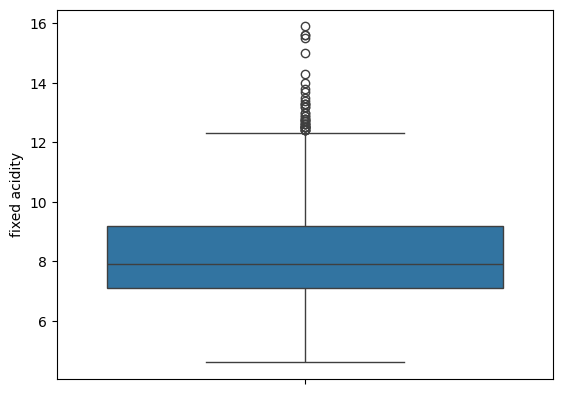

Strongly Correlated with fixed acidity:
Spearman:
citric acid    0.657387
density        0.626628
pH            -0.708560
Name: fixed acidity, dtype: float64


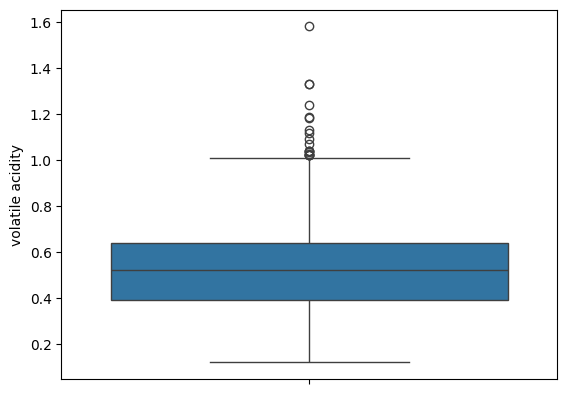

Strongly Correlated with volatile acidity:
Spearman:
citric acid   -0.610925
Name: volatile acidity, dtype: float64


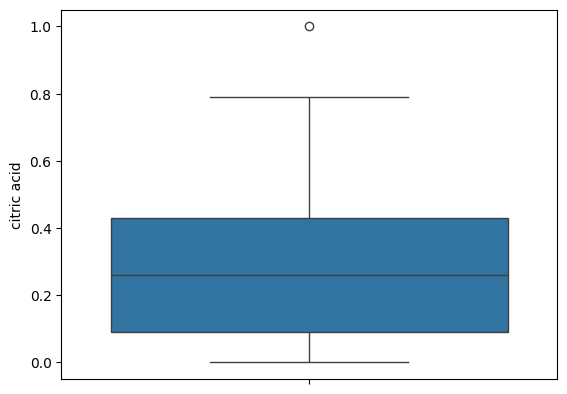

Strongly Correlated with citric acid:
Spearman:
fixed acidity       0.657387
volatile acidity   -0.610925
pH                 -0.558594
Name: citric acid, dtype: float64


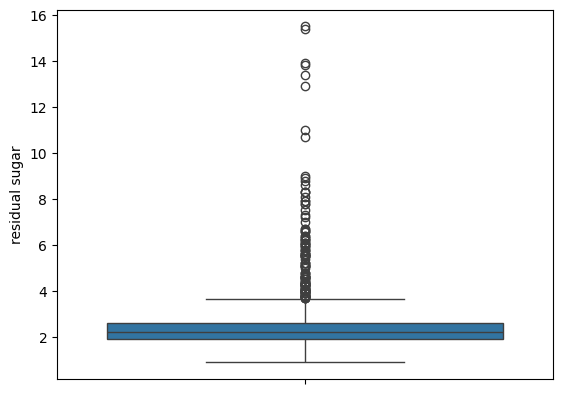

Strongly Correlated with residual sugar:
Spearman:
Series([], Name: residual sugar, dtype: float64)


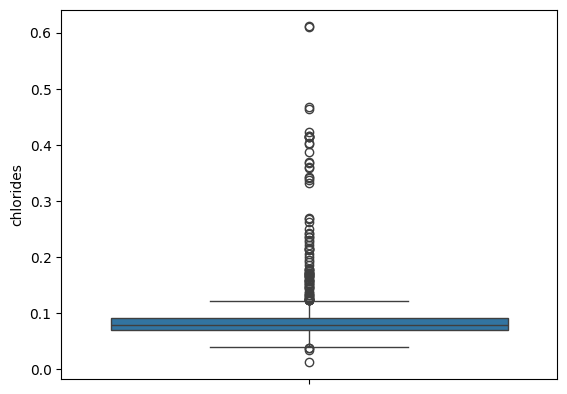

Strongly Correlated with chlorides:
Spearman:
Series([], Name: chlorides, dtype: float64)


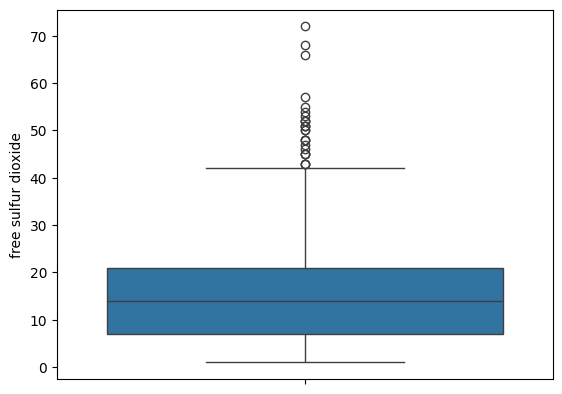

Strongly Correlated with free sulfur dioxide:
Spearman:
total sulfur dioxide    0.789881
Name: free sulfur dioxide, dtype: float64


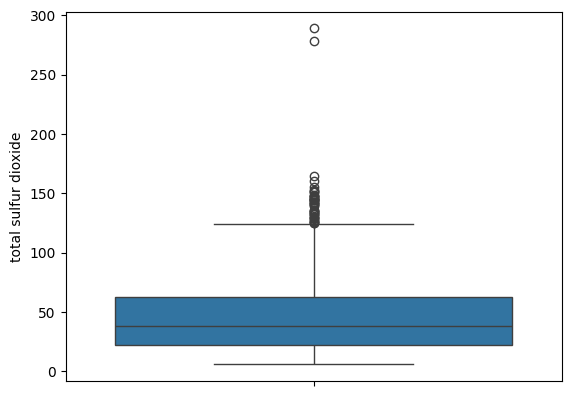

Strongly Correlated with total sulfur dioxide:
Spearman:
free sulfur dioxide    0.789881
Name: total sulfur dioxide, dtype: float64


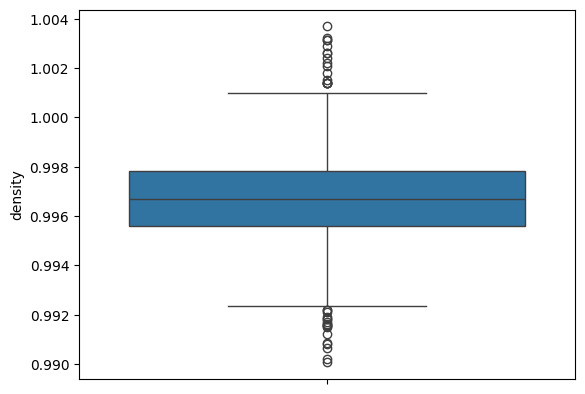

Strongly Correlated with density:
Spearman:
fixed acidity    0.626628
alcohol         -0.470019
Name: density, dtype: float64


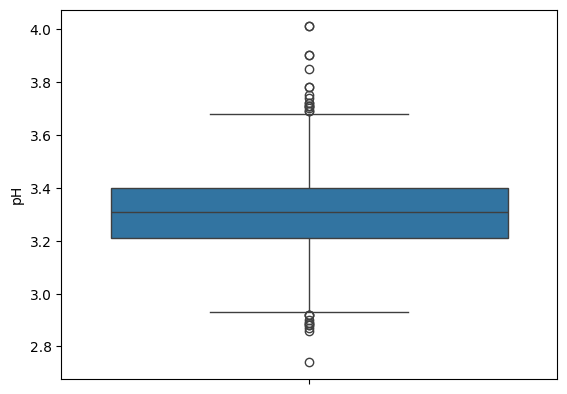

Strongly Correlated with pH:
Spearman:
fixed acidity   -0.708560
citric acid     -0.558594
Name: pH, dtype: float64


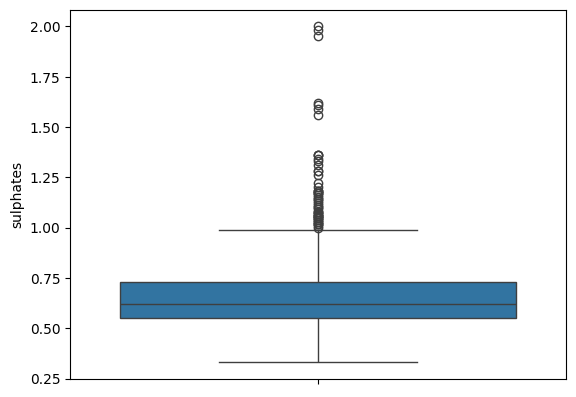

Strongly Correlated with sulphates:
Spearman:
Series([], Name: sulphates, dtype: float64)


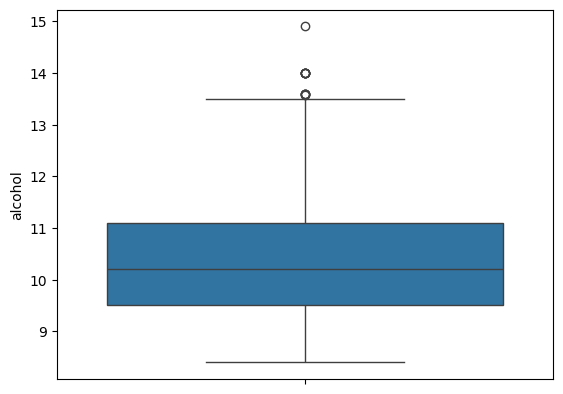

Strongly Correlated with alcohol:
Spearman:
density   -0.470019
quality    0.487965
Name: alcohol, dtype: float64


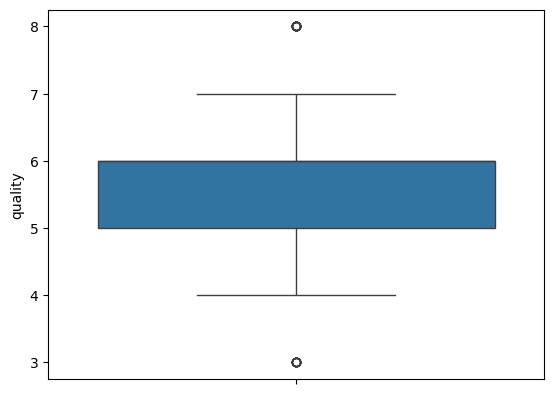

Strongly Correlated with quality:
Spearman:
alcohol    0.487965
Name: quality, dtype: float64


In [101]:
create_boxplots(df_red, corr_matrix_red_spear)

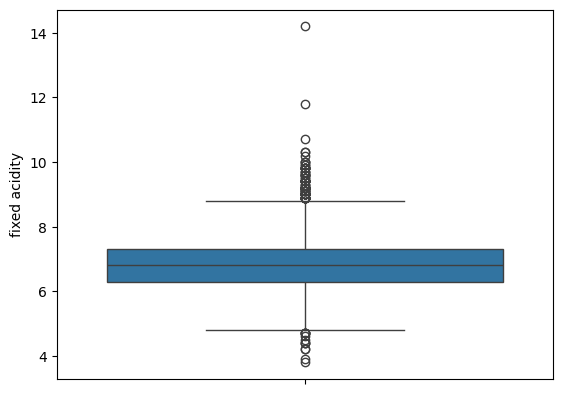

Strongly Correlated with fixed acidity:
Spearman:
Series([], Name: fixed acidity, dtype: float64)


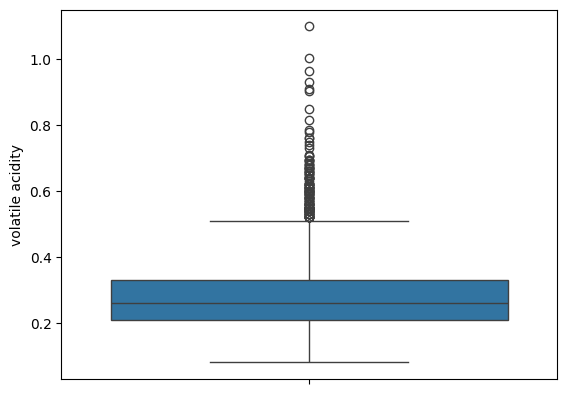

Strongly Correlated with volatile acidity:
Spearman:
Series([], Name: volatile acidity, dtype: float64)


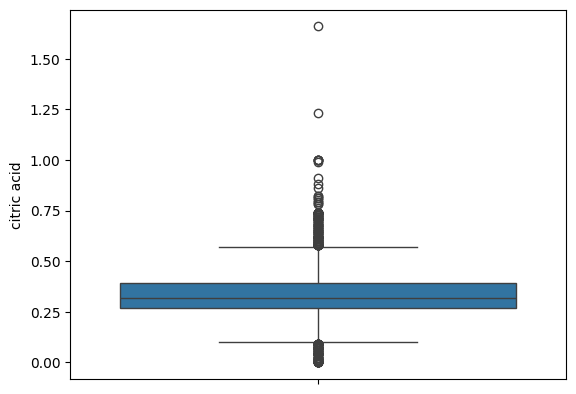

Strongly Correlated with citric acid:
Spearman:
Series([], Name: citric acid, dtype: float64)


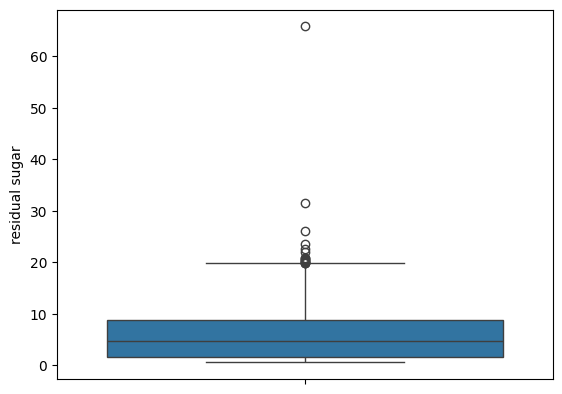

Strongly Correlated with residual sugar:
Spearman:
density    0.743296
Name: residual sugar, dtype: float64


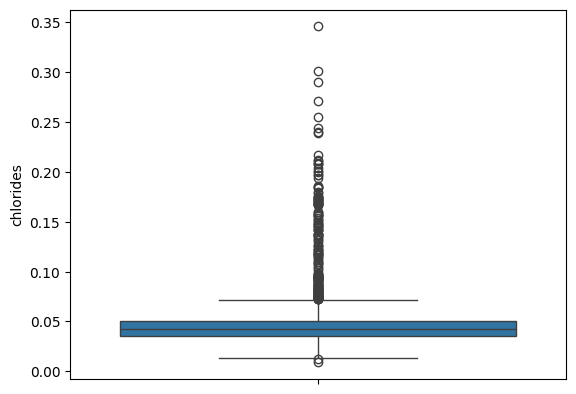

Strongly Correlated with chlorides:
Spearman:
density    0.500773
alcohol   -0.565509
Name: chlorides, dtype: float64


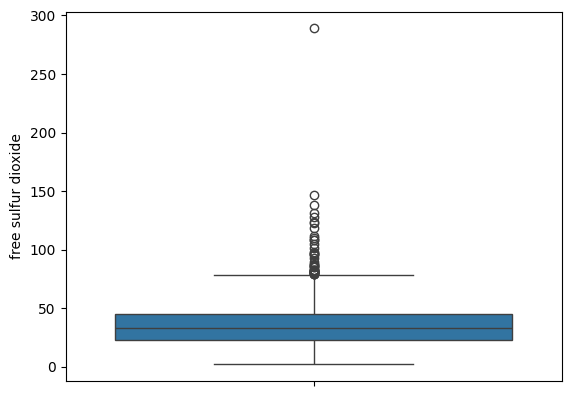

Strongly Correlated with free sulfur dioxide:
Spearman:
total sulfur dioxide    0.619998
Name: free sulfur dioxide, dtype: float64


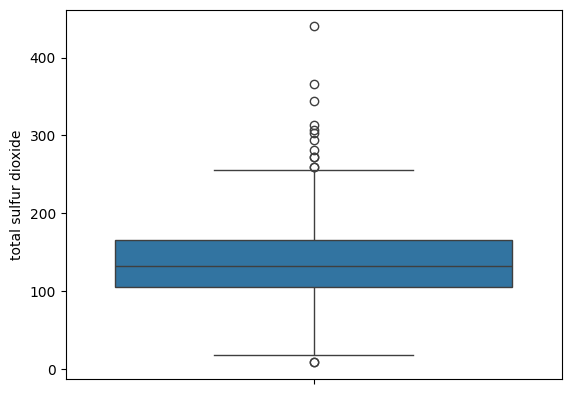

Strongly Correlated with total sulfur dioxide:
Spearman:
free sulfur dioxide    0.619998
density                0.568226
alcohol               -0.473471
Name: total sulfur dioxide, dtype: float64


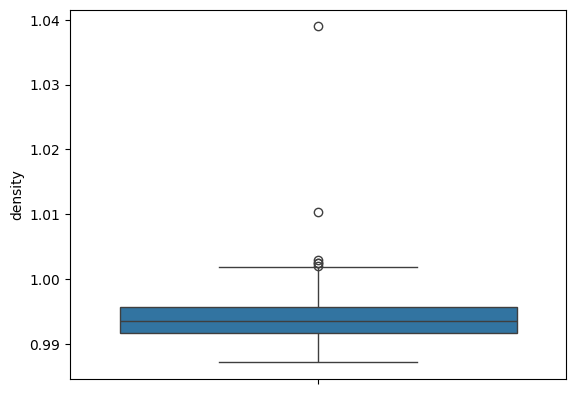

Strongly Correlated with density:
Spearman:
residual sugar          0.743296
chlorides               0.500773
total sulfur dioxide    0.568226
alcohol                -0.808451
Name: density, dtype: float64


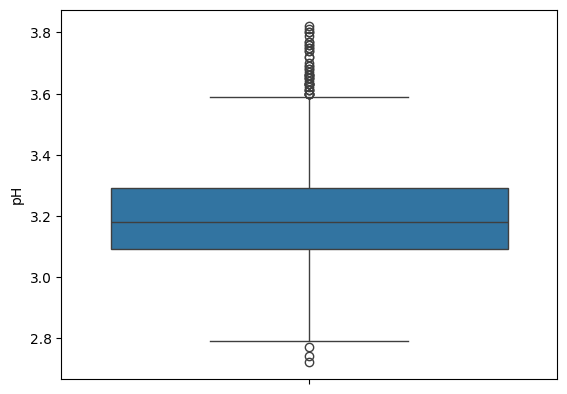

Strongly Correlated with pH:
Spearman:
Series([], Name: pH, dtype: float64)


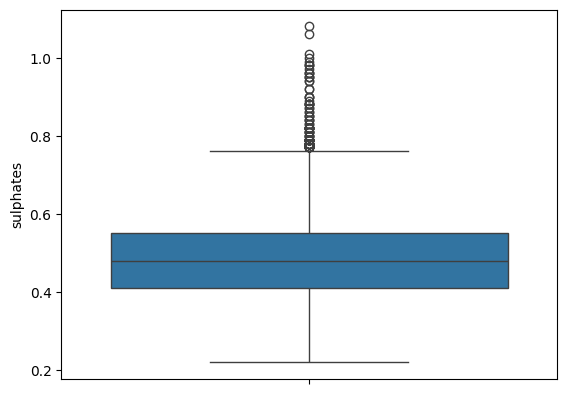

Strongly Correlated with sulphates:
Spearman:
Series([], Name: sulphates, dtype: float64)


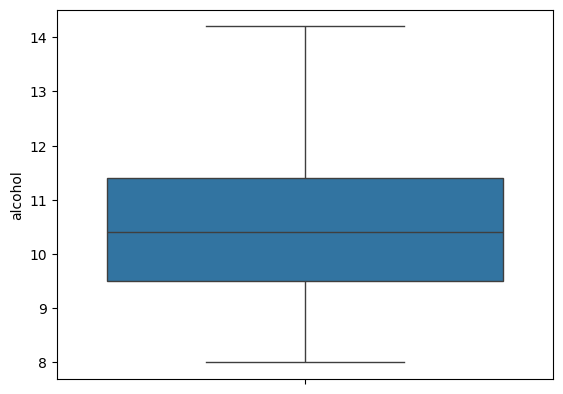

Strongly Correlated with alcohol:
Spearman:
chlorides              -0.565509
total sulfur dioxide   -0.473471
density                -0.808451
quality                 0.475713
Name: alcohol, dtype: float64


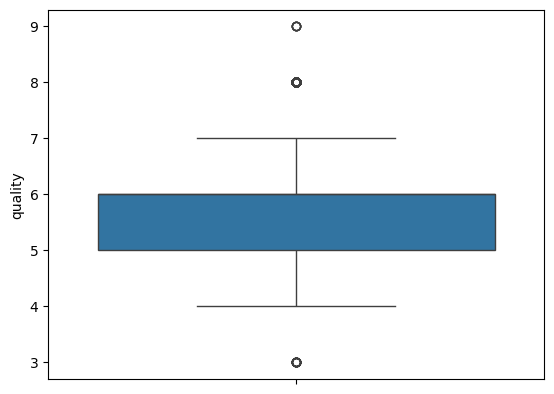

Strongly Correlated with quality:
Spearman:
alcohol    0.475713
Name: quality, dtype: float64


In [102]:
create_boxplots(df_white, corr_matrix_white_spear)

### 6.1.*Capping values to tackle outliers*

In [103]:
df_red.shape

(1359, 12)

In [104]:
df_white.shape

(3961, 12)

In [105]:
def winsorize_dataset(df, target):

    # apply winsorization column by column
    for col in df.columns:
        if col != target:   # skip target
            df[col] = winsorize(df[col], limits=[0.01, 0.01])

    return df

In [106]:
# using winsorization cause I don't want to remove outliers
df_red_wins = winsorize_dataset(df_red, 'quality')
df_white_wins = winsorize_dataset(df_white, 'quality')

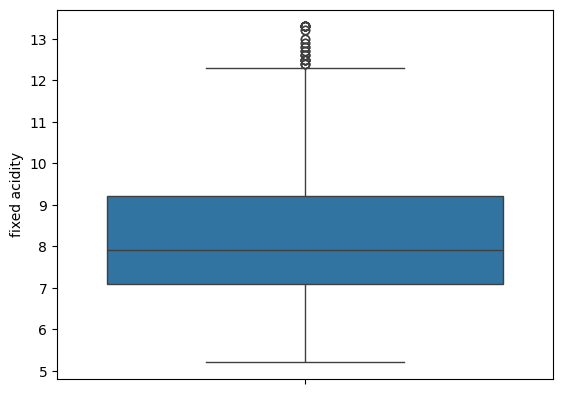

Strongly Correlated with fixed acidity:
Spearman:
citric acid    0.657387
density        0.626628
pH            -0.708560
Name: fixed acidity, dtype: float64


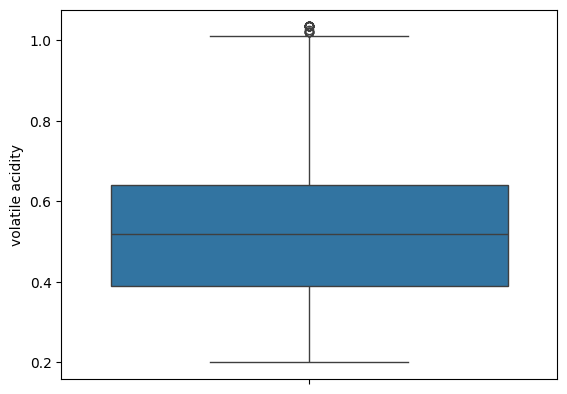

Strongly Correlated with volatile acidity:
Spearman:
citric acid   -0.610925
Name: volatile acidity, dtype: float64


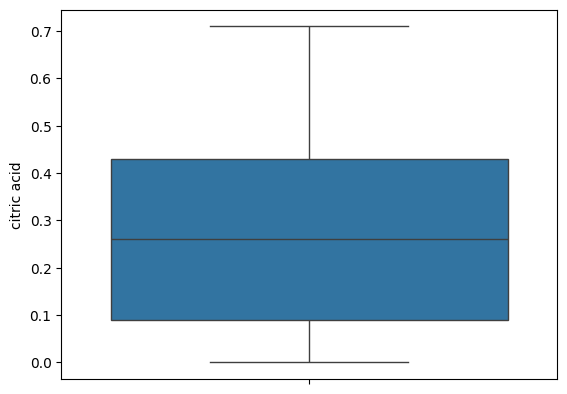

Strongly Correlated with citric acid:
Spearman:
fixed acidity       0.657387
volatile acidity   -0.610925
pH                 -0.558594
Name: citric acid, dtype: float64


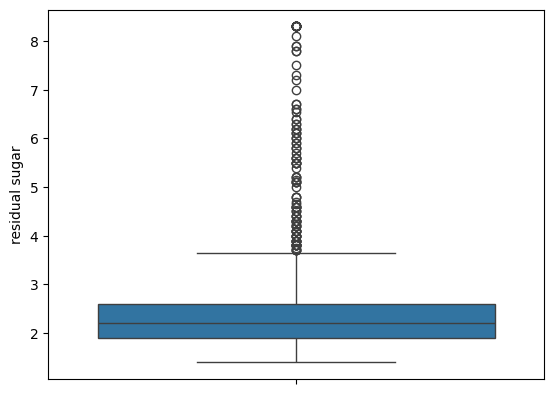

Strongly Correlated with residual sugar:
Spearman:
Series([], Name: residual sugar, dtype: float64)


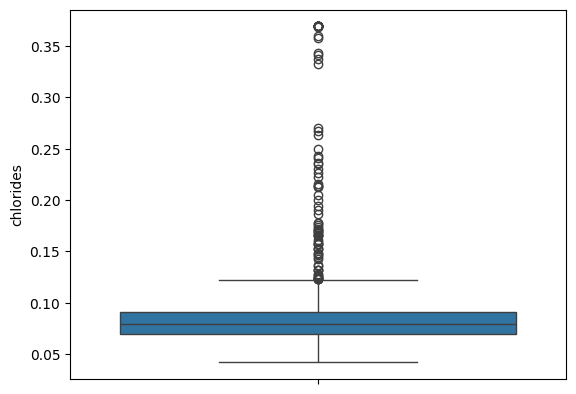

Strongly Correlated with chlorides:
Spearman:
Series([], Name: chlorides, dtype: float64)


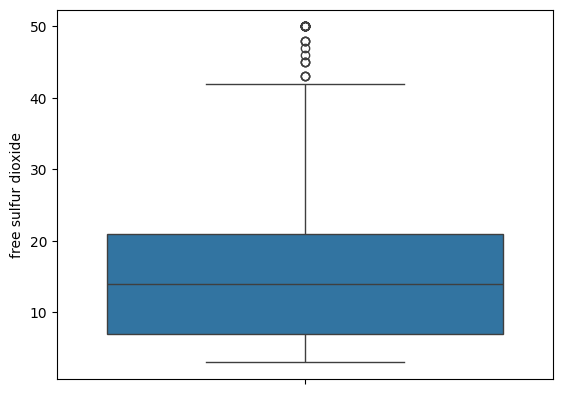

Strongly Correlated with free sulfur dioxide:
Spearman:
total sulfur dioxide    0.789881
Name: free sulfur dioxide, dtype: float64


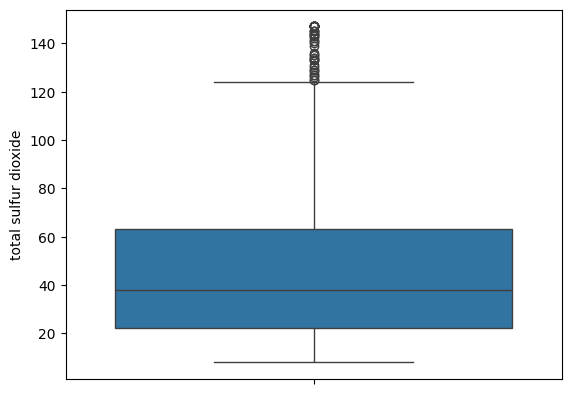

Strongly Correlated with total sulfur dioxide:
Spearman:
free sulfur dioxide    0.789881
Name: total sulfur dioxide, dtype: float64


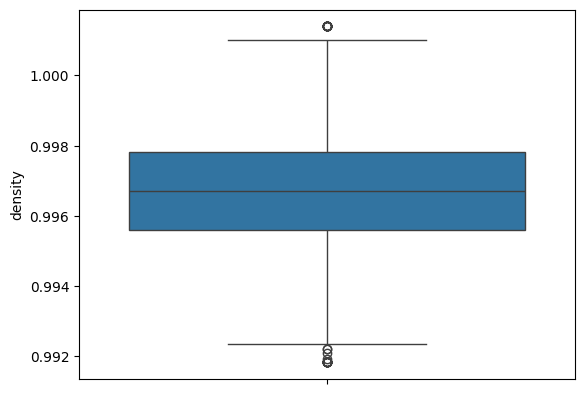

Strongly Correlated with density:
Spearman:
fixed acidity    0.626628
alcohol         -0.470019
Name: density, dtype: float64


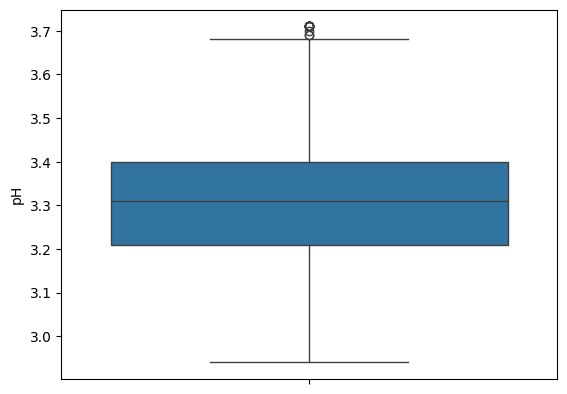

Strongly Correlated with pH:
Spearman:
fixed acidity   -0.708560
citric acid     -0.558594
Name: pH, dtype: float64


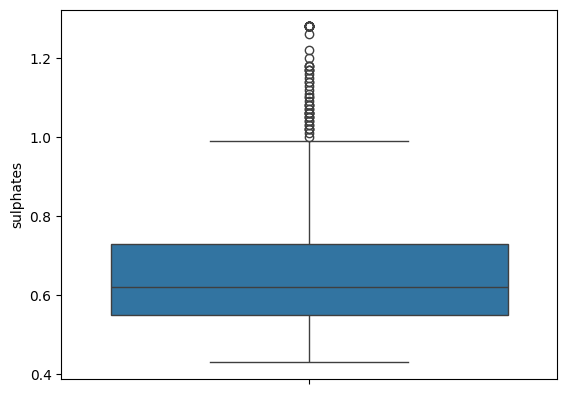

Strongly Correlated with sulphates:
Spearman:
Series([], Name: sulphates, dtype: float64)


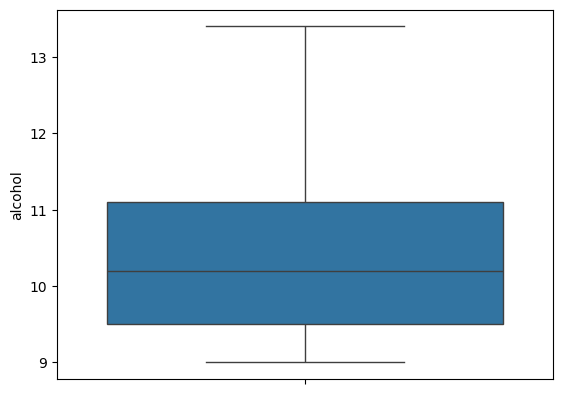

Strongly Correlated with alcohol:
Spearman:
density   -0.470019
quality    0.487965
Name: alcohol, dtype: float64


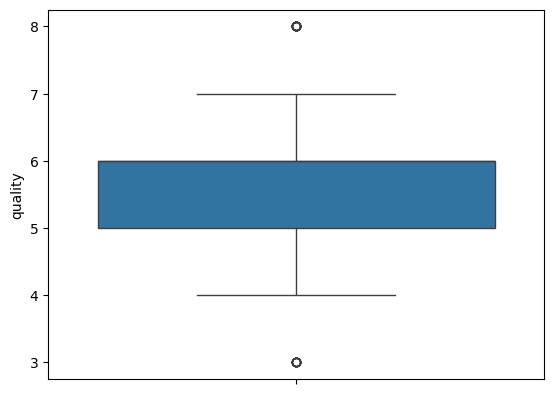

Strongly Correlated with quality:
Spearman:
alcohol    0.487965
Name: quality, dtype: float64


In [107]:
create_boxplots(df_red_wins, corr_matrix_red_spear)

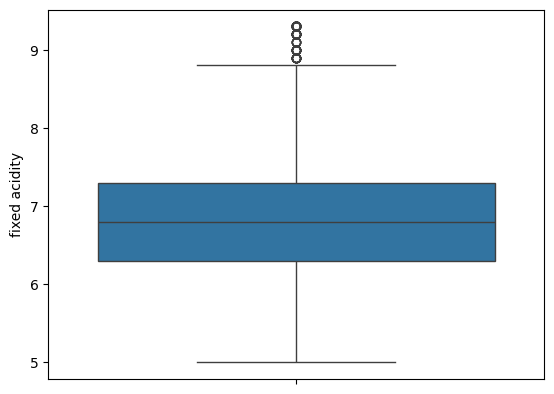

Strongly Correlated with fixed acidity:
Spearman:
Series([], Name: fixed acidity, dtype: float64)


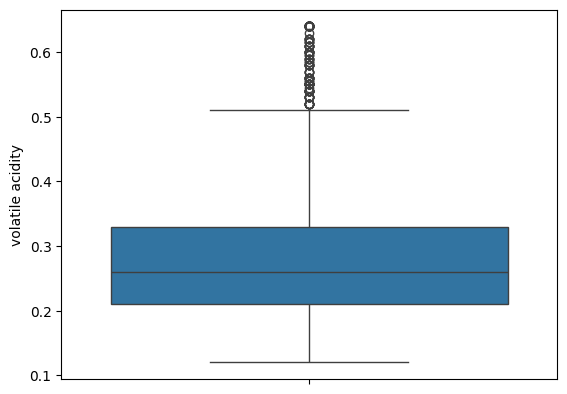

Strongly Correlated with volatile acidity:
Spearman:
Series([], Name: volatile acidity, dtype: float64)


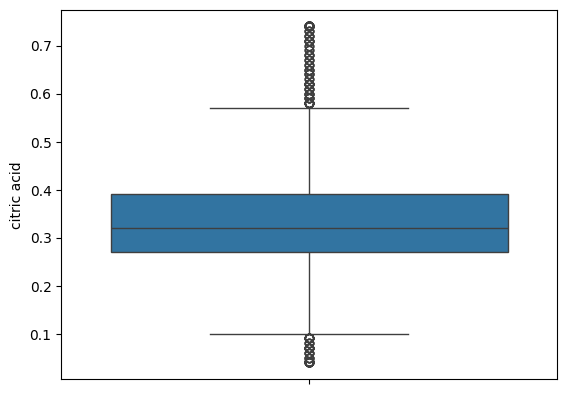

Strongly Correlated with citric acid:
Spearman:
Series([], Name: citric acid, dtype: float64)


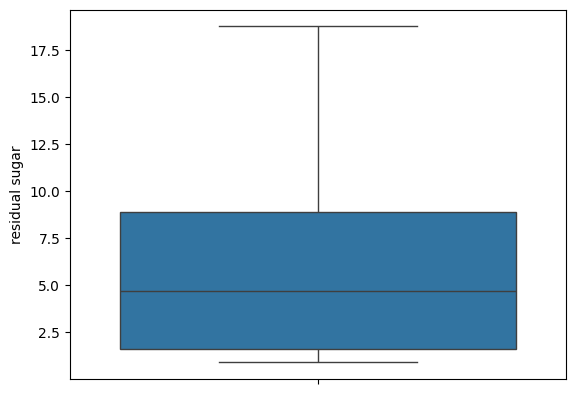

Strongly Correlated with residual sugar:
Spearman:
density    0.743296
Name: residual sugar, dtype: float64


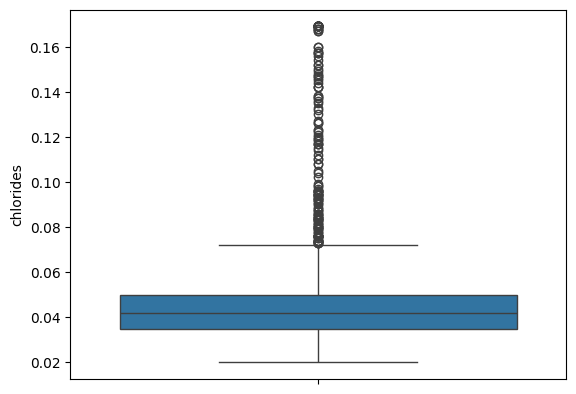

Strongly Correlated with chlorides:
Spearman:
density    0.500773
alcohol   -0.565509
Name: chlorides, dtype: float64


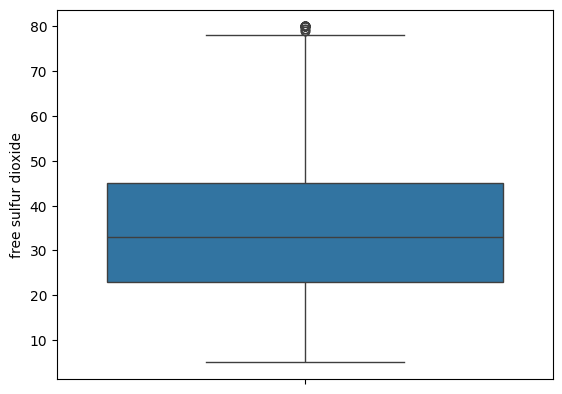

Strongly Correlated with free sulfur dioxide:
Spearman:
total sulfur dioxide    0.619998
Name: free sulfur dioxide, dtype: float64


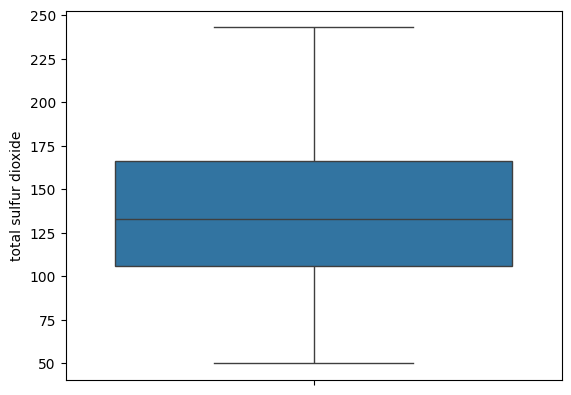

Strongly Correlated with total sulfur dioxide:
Spearman:
free sulfur dioxide    0.619998
density                0.568226
alcohol               -0.473471
Name: total sulfur dioxide, dtype: float64


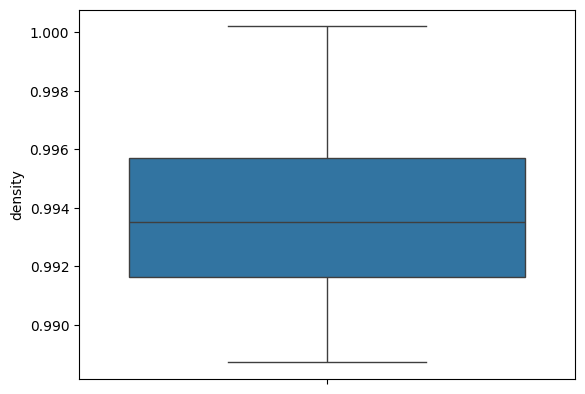

Strongly Correlated with density:
Spearman:
residual sugar          0.743296
chlorides               0.500773
total sulfur dioxide    0.568226
alcohol                -0.808451
Name: density, dtype: float64


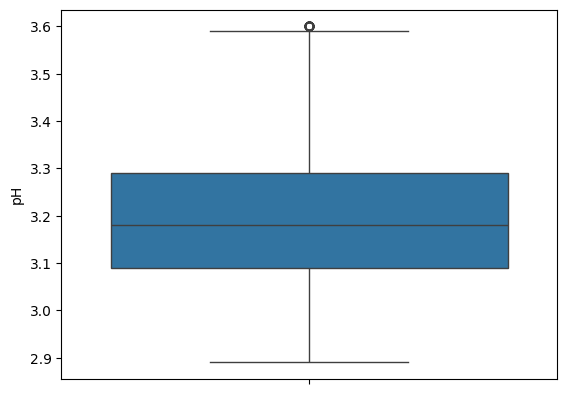

Strongly Correlated with pH:
Spearman:
Series([], Name: pH, dtype: float64)


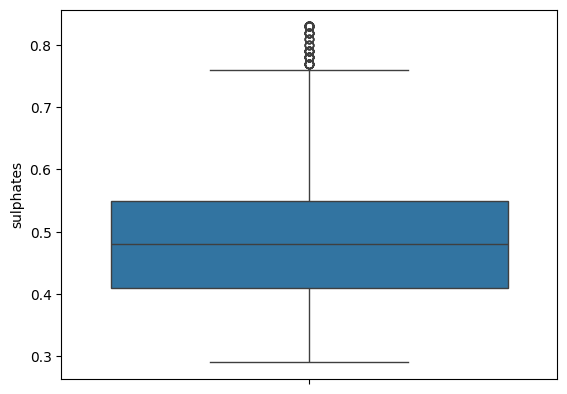

Strongly Correlated with sulphates:
Spearman:
Series([], Name: sulphates, dtype: float64)


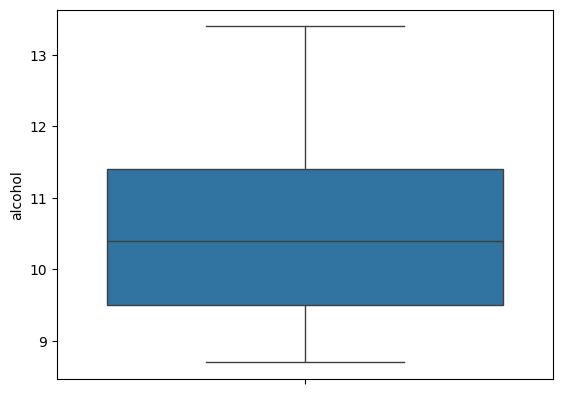

Strongly Correlated with alcohol:
Spearman:
chlorides              -0.565509
total sulfur dioxide   -0.473471
density                -0.808451
quality                 0.475713
Name: alcohol, dtype: float64


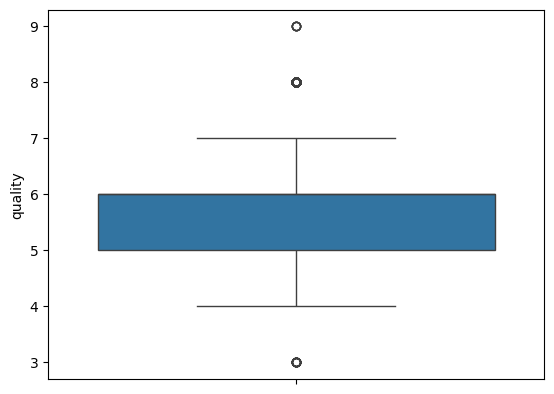

Strongly Correlated with quality:
Spearman:
alcohol    0.475713
Name: quality, dtype: float64


In [108]:
create_boxplots(df_white_wins, corr_matrix_white_spear)

In [109]:
# using standard scaling
scaler = StandardScaler()
df_red_wins_scaled = df_red_wins.copy()
df_white_wins_scaled = df_white_wins.copy()

In [110]:
print(df_red.columns)
print(df_white.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [111]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [112]:
df_red_wins_scaled[cols] = scaler.fit_transform(df_red_wins_scaled[cols])
df_white_wins_scaled[cols] = scaler.fit_transform(df_white_wins_scaled[cols])

In [113]:
df_red_wins_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.532016,0.967994,-1.400957,-0.521653,-0.262309,-0.474408,-0.390729,0.602543,1.335338,-0.620007,-0.967074,5
1,-0.296220,1.982805,-1.400957,0.093048,0.243692,0.899216,0.633800,0.052488,-0.727227,0.152538,-0.591372,5
2,-0.296220,1.306264,-1.194756,-0.170395,0.105692,-0.081944,0.230198,0.162499,-0.328021,-0.040598,-0.591372,5
3,1.708046,-1.399896,1.485849,-0.521653,-0.285309,0.114288,0.416476,0.712554,-0.993364,-0.491249,-0.591372,6
5,-0.532016,0.742481,-1.400957,-0.609467,-0.285309,-0.278176,-0.204451,0.602543,1.335338,-0.620007,-0.967074,5


In [114]:
df_white_wins_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.195694,-0.097739,0.226190,2.723930,-0.028613,0.642629,0.784270,2.311671,-1.321817,-0.360537,-1.480369,6
1,-0.640298,0.206859,0.054817,-0.908391,0.167471,-1.286476,-0.121816,0.080487,0.711655,0.003191,-0.900805,6
2,1.509395,0.003794,0.568936,0.214134,0.216492,-0.290809,-0.956369,0.476342,0.440526,-0.451469,-0.404035,6
3,0.434549,-0.503869,-0.116556,0.553009,0.608660,0.767088,1.165779,0.656276,-0.033951,-0.815196,-0.569625,6
6,-0.759725,0.409924,-1.487541,0.235314,-0.028613,-0.290809,-0.026439,0.404369,-0.101734,-0.178673,-0.818010,6


## 7.**Gathering Insights**

In [115]:
# Insights:
# All columns (features) are important
# There were outliers but removing them might hamper the nature of dataset so used winsorization
# Also scaled the data as I will be using SVM and KNN which are sensitive to scaling issues
# The feature: Alcohol, was found to have good correlation with target in both red and wine dataset
# will use SMOTE later during modeling to handle data imbalance

In [116]:
# exporting the cleaned datasets
import os
file_names = ['clean_red_wine', 'clean_white_wine']
for file in file_names:
    if os.path.exists(f'data/{file}'):
        print(f'File {file} already exists!!!')
    else:
        df_red_wins_scaled.to_csv('./data/clean_red_wine.csv', index=False)
        df_white_wins_scaled.to_csv('./data/clean_white_wine.csv', index=False)